# **Time Series Analysis using Python**

Time series analysis means analyzing and finding patterns in a time series dataset. A time-series dataset is a sequence of data collected over an interval of time. Stock price data, monthly sales data, daily rainfall data, hourly website traffic data are some examples of time-series data that you will get to solve business problems

The time interval of a time series data can be weekly, monthly, daily, or even hourly time intervals, but the process of analyzing your data will remain the same in most of the problems.

Let’s start the task of Time Series Analysis using Python by importing the necessary Python libraries and a time series dataset:

In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=720)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('AAPL',
                      start=start_date,
                      end=end_date,
                      progress=False)
print(data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-09-27  145.470001  145.960007  143.820007  145.369995  143.707397   
2021-09-28  143.250000  144.750000  141.690002  141.910004  140.286987   
2021-09-29  142.470001  144.449997  142.029999  142.830002  141.196472   
2021-09-30  143.660004  144.380005  141.279999  141.500000  139.881668   
2021-10-01  141.899994  142.919998  139.110001  142.649994  141.018539   

               Volume  
Date                   
2021-09-27   74150700  
2021-09-28  108972300  
2021-09-29   74602000  
2021-09-30   89056700  
2021-10-01   94639600  


In the above code, I have used the yfinance API to extract the latest stock price data.

In [2]:
import plotly.express as px
figure = px.line(data, x = data.index,
                 y = "Close",
                 title = "Time Series Analysis (Line Plot)")
figure.show()

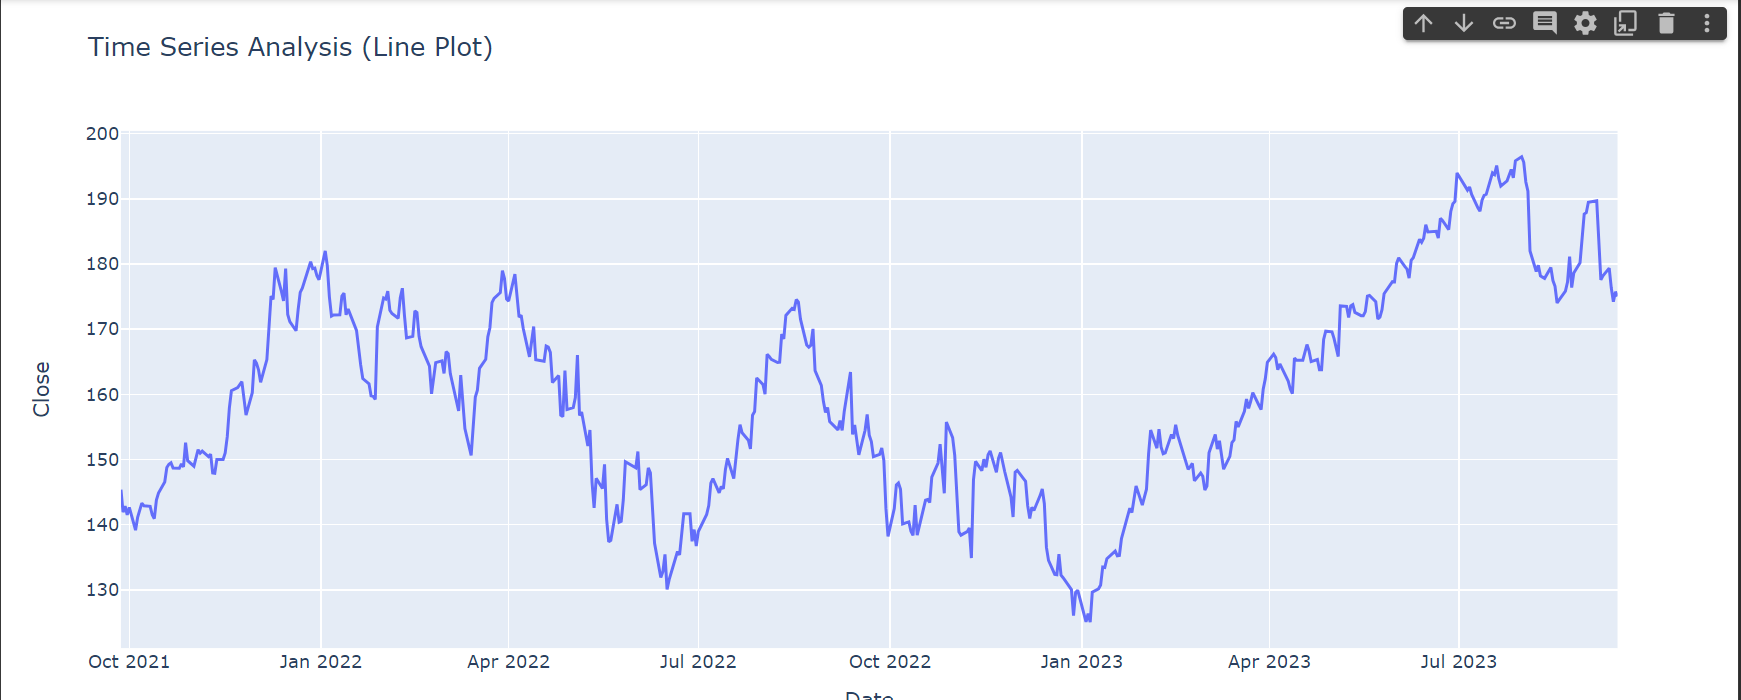

A line plot is one of the best visualization tools while working on Time series analysis. In the above code, I am visualizing the trends in the close prices of Apple. If you place the cursor on the line, you will see the Close price on the exact date of the data point on which your cursor is.

Now let’s visualize a candlestick chart to see the trends in the open, high, low, and close prices of Apple:

In [3]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x = data.index,
                                        open = data["Open"],
                                        high = data["High"],
                                        low = data["Low"],
                                        close = data["Close"])])
figure.update_layout(title = "Time Series Analysis (Candlestick Chart)",
                     xaxis_rangeslider_visible = False)
figure.show()

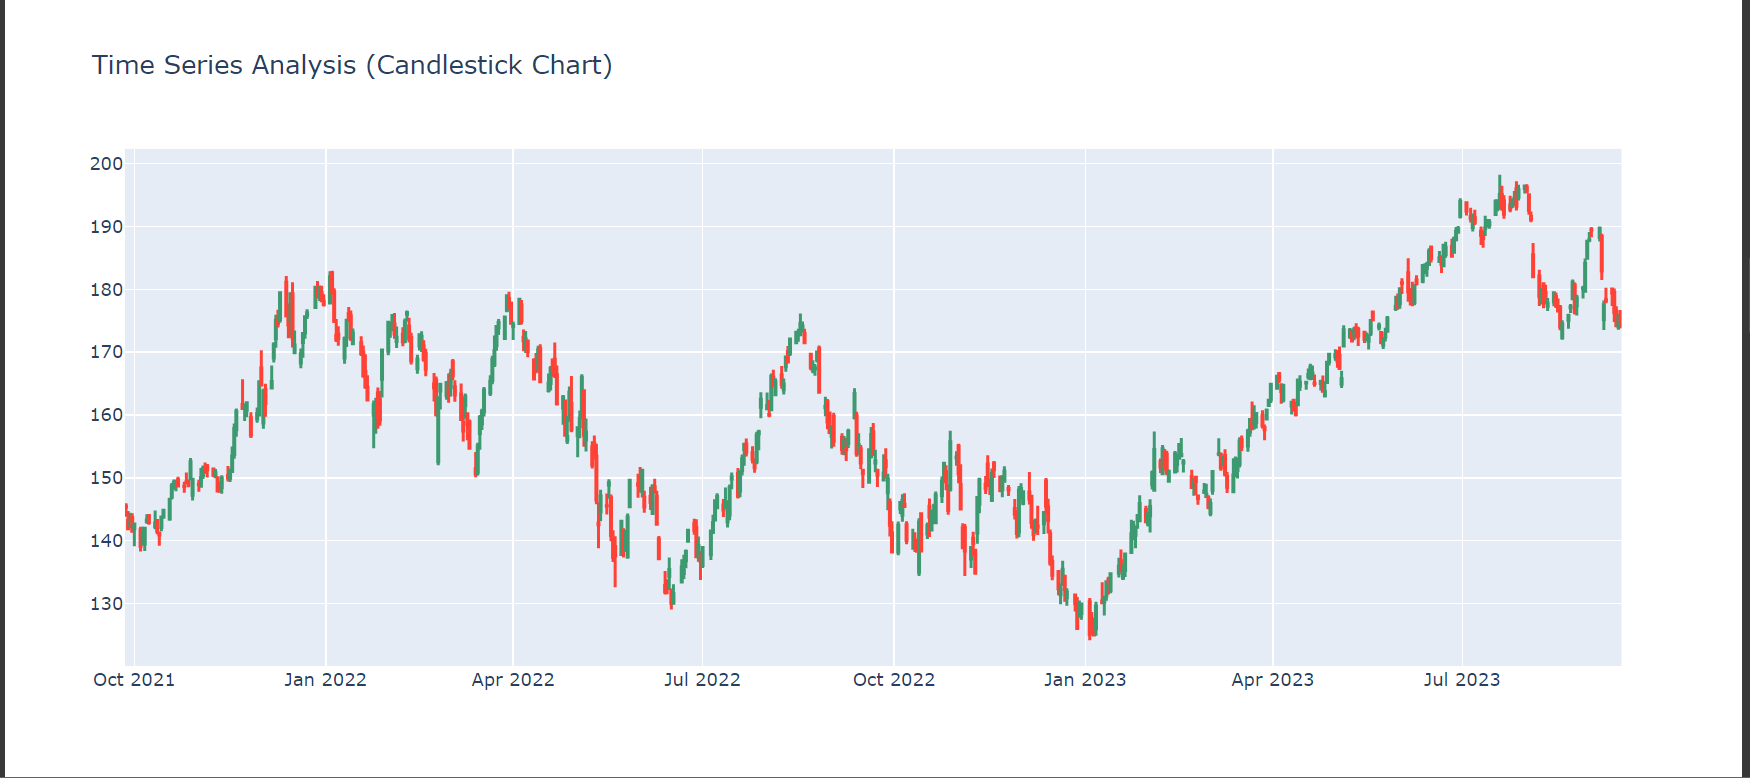

A candlestick chart is always helpful in the time series analysis of a financial instrument. If you place the cursor on any point in the above candlestick chart, you will see all the prices of Apple (open, high, low, and close) on the date where your cursor is. The red lines of this chart indicate a fall in prices, and the green lines indicate an increase in prices.

Now let’s visualize a bar plot to visualize the trends of close prices over the period:

In [4]:
figure = px.bar(data, x = data.index,
                y = "Close",
                title = "Time Series Analysis (Bar Plot)" )
figure.show()

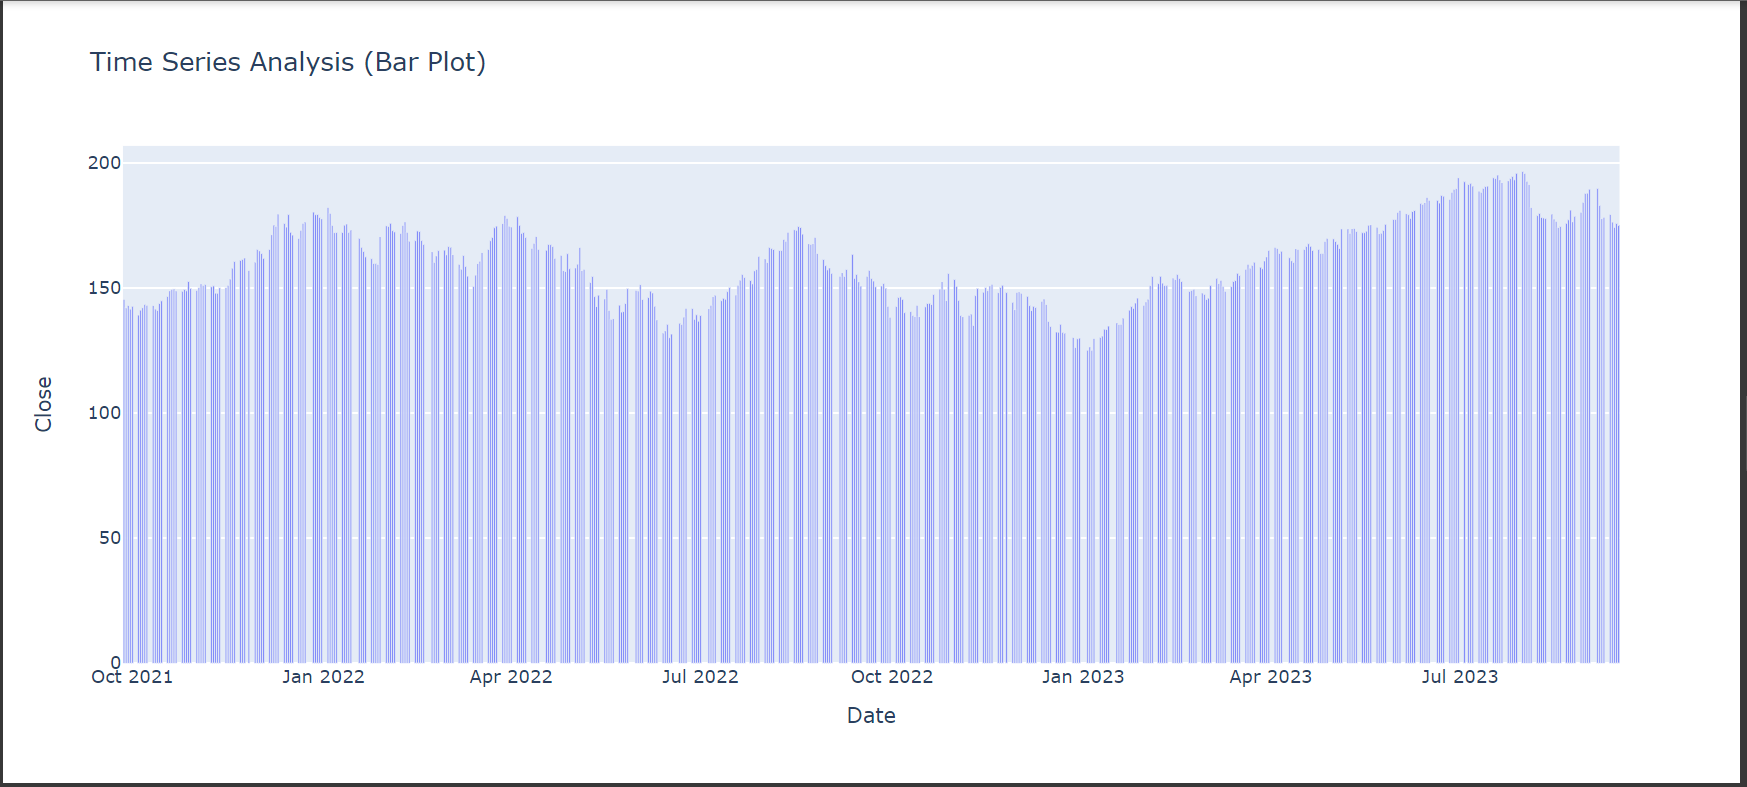

The bar plot above shows an increase in stock prices in the long term scenario. The line chart and candlestick chart show you increase and decrease of the price, but if you want to see the price increase and decrease in the long term, you should always prefer a bar chart.

Next i analyze stock prices between the period of two specific dates:

In [5]:
figure = px.line(data, x = data.index,
                 y = 'Close',
                 range_x = ['2021-07-01','2021-12-31'],
                 title = "Time Series Analysis (Custom Date Range)")
figure.show()

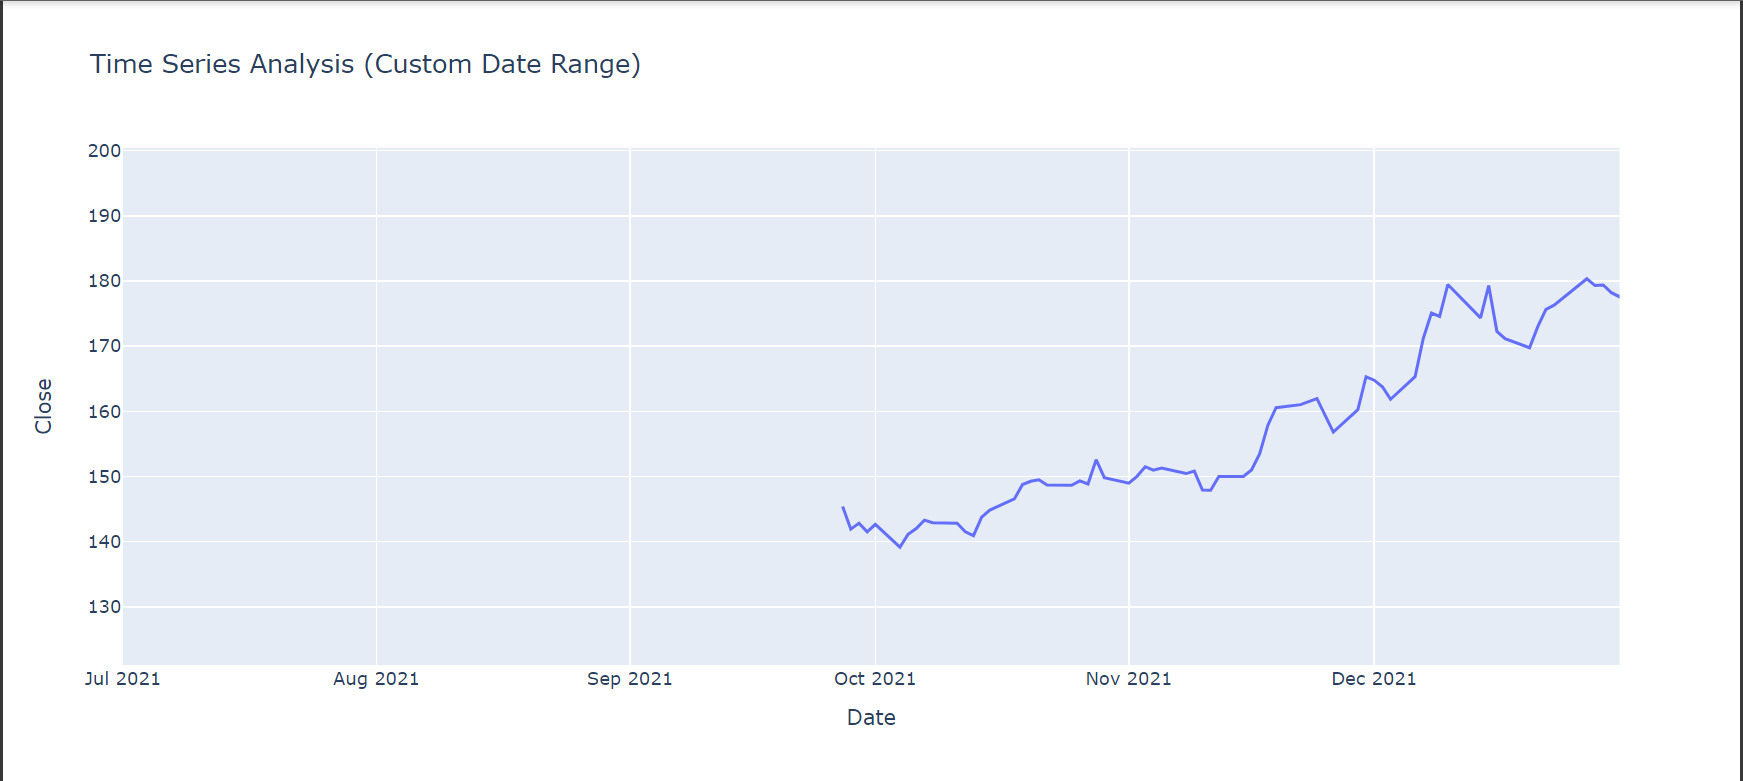

One of the best ways to analyze a time series data is to create an interactive visualization where you can manually select the time interval in the output visualization itself. One way to do it is to add a slider below your visualization and buttons to control time intervals above your visualization.

Below I create an interactive candlestick chart where you can select time intervals in the output itself:

In [6]:
figure = go.Figure(data = [go.Candlestick(x = data.index,
                                        open = data["Open"],
                                        high = data["High"],
                                        low = data["Low"],
                                        close = data["Close"])])
figure.update_layout(title = "Time Series Analysis (Candlestick Chart with Buttons and Slider)")

figure.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = "1m", step = "month", stepmode = "backward"),
            dict(count = 6, label = "6m", step = "month", stepmode = "backward"),
            dict(count = 1, label = "YTD", step = "year", stepmode = "todate"),
            dict(count = 1, label = "1y", step = "year", stepmode = "backward"),
            dict(step = "all")
        ])
    )
)
figure.show()

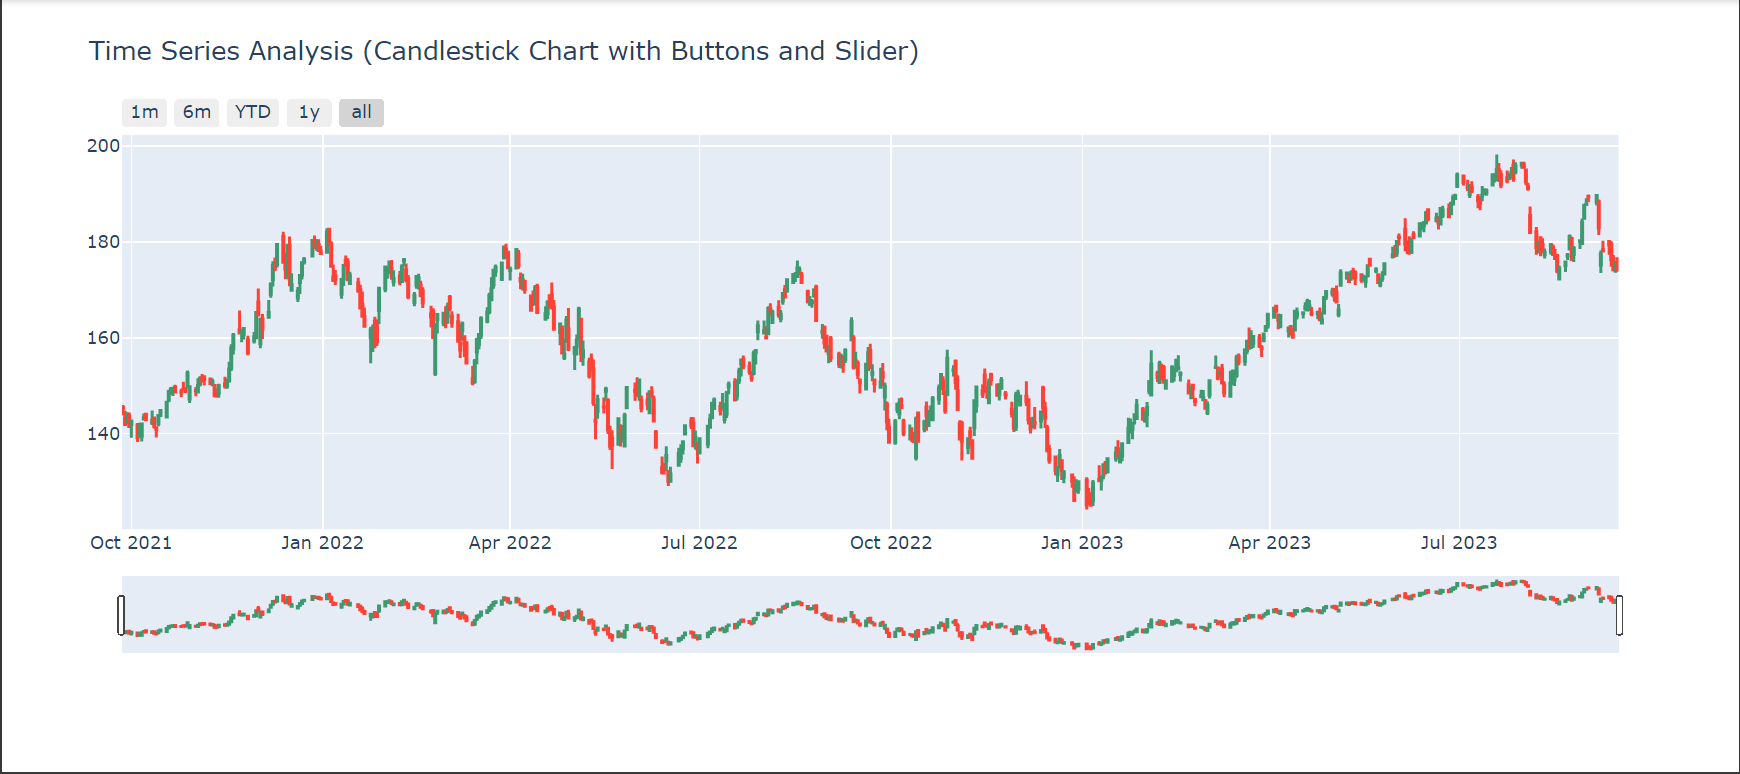